In [3]:
import pandas as pd 
import os, sys
current_dir = os.getcwd()
# print(current_dir)
# Get the parent directory
parent_dir = os.path.dirname(current_dir)
# print(parent_dir)
# Insert the path to the parent directory
sys.path.insert(0, parent_dir)

In [4]:
from scripts.load_data import LoadData

In [5]:
db = LoadData()


In [6]:
db.connect()


In [7]:
df = db.fetch_data("SELECT * FROM xdr_data;")


d:\Projects\10ac\Situational-Overview-Business-need-analyses\scripts\load_data.py:49: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, self.connection, params=params)


In [6]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [7]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [8]:
from scripts.data_agregator import DataAggregator

In [9]:
aggregator = DataAggregator(df)


In [10]:
result=aggregator.aggregate_per_user(user_col='IMSI')

In [11]:
result.head(10)


,IMSI,number_of_sessions,total_session_duration,total_download,total_upload,Social Media DL (Bytes),Google DL (Bytes),Email DL (Bytes),Youtube DL (Bytes),Netflix DL (Bytes),Gaming DL (Bytes),Other DL (Bytes),Social Media UL (Bytes),Google UL (Bytes),Email UL (Bytes),Youtube UL (Bytes),Netflix UL (Bytes),Gaming UL (Bytes),Other UL (Bytes)
0,2.040471e+14,1,869844.0,78697597.0,60456049.0,1500145.0,5985089.0,2518425.0,18980320.0,21621336.0,28092282.0,3.891597e+08,45943.0,3233558.0,812549.0,21960390.0,7224894.0,14977978.0,12200737.0
1,2.040808e+14,1,877385.0,194828056.0,37295915.0,668596.0,8572779.0,842279.0,9839889.0,10340908.0,164563605.0,4.676781e+08,46628.0,1865881.0,678492.0,2120016.0,16251392.0,13485133.0,2848373.0
2,2.082001e+14,1,86019.0,31376981.0,53794658.0,3073697.0,603691.0,3076735.0,5556563.0,15305361.0,3760934.0,5.000445e+08,49084.0,1020971.0,580766.0,14325876.0,16525201.0,5363582.0,15929178.0
3,2.082001e+14,1,86254.0,392918313.0,33583272.0,2542767.0,10699827.0,3248863.0,22414714.0,10065639.0,343946503.0,3.009029e+08,34337.0,3111651.0,606871.0,3242918.0,17720213.0,159394.0,8707888.0
4,2.082001e+14,2,573923.0,961767023.0,71325004.0,3326811.0,9118088.0,4225757.0,4046597.0,30748449.0,910301321.0,1.055869e+09,99905.0,2547799.0,1338705.0,9793604.0,26594966.0,7383445.0,23566580.0
5,2.082001e+14,1,13835.0,665593389.0,39212281.0,996268.0,9712501.0,3110793.0,14819244.0,15494900.0,621459683.0,5.487023e+08,55565.0,3562840.0,328100.0,4777564.0,18682284.0,11285996.0,519932.0
6,2.082001e+14,2,372454.0,886414496.0,70799015.0,3725468.0,17794518.0,2970311.0,22423599.0,11125776.0,828374824.0,4.664378e+08,61955.0,1955085.0,1357475.0,28483644.0,18756361.0,6844074.0,13340421.0
7,2.082001e+14,2,232058.0,963285344.0,38413689.0,5135342.0,10633680.0,4239010.0,7080191.0,11084592.0,925112529.0,1.060999e+09,57368.0,3430744.0,1302415.0,4743270.0,5962954.0,14486203.0,8430735.0
8,2.082001e+14,1,86399.0,425721468.0,26142870.0,1222570.0,4829972.0,195248.0,10863143.0,13933340.0,394677195.0,7.964959e+08,43904.0,835257.0,308702.0,5446918.0,11341471.0,5596614.0,2570004.0
9,2.082001e+14,1,136356.0,314032149.0,53095277.0,2204363.0,7763124.0,957653.0,15259721.0,8292425.0,279554863.0,3.515693e+08,19414.0,1312339.0,688209.0,20625771.0,17303078.0,10452308.0,2694158.0


In [12]:
result[['IMSI','total_session_duration']]

,IMSI,total_session_duration
0,2.040471e+14,869844.0
1,2.040808e+14,877385.0
2,2.082001e+14,86019.0
3,2.082001e+14,86254.0
4,2.082001e+14,573923.0
...,...,...
107260,2.082099e+14,127367.0
107261,2.082099e+14,168543.0
107262,2.082099e+14,86399.0
107263,2.082522e+14,56613.0


In [11]:
from scripts.data_analyses import DataAnalysis

analysis=DataAnalysis(df)
description, data_types = analysis.describe_variables()
print(description)
print(data_types)

           Bearer Id           Start       Start ms             End  \
count   1.490100e+05          150000  150000.000000          150000   
unique           NaN            9997            NaN            6403   
top              NaN  4/26/2019 7:25            NaN  4/25/2019 0:01   
freq             NaN             203            NaN            1150   
mean    1.013887e+19             NaN     499.188200             NaN   
std     2.893173e+18             NaN     288.611834             NaN   
min     6.917538e+18             NaN       0.000000             NaN   
25%     7.349883e+18             NaN     250.000000             NaN   
50%     7.349883e+18             NaN     499.000000             NaN   
75%     1.304243e+19             NaN     749.000000             NaN   
max     1.318654e+19             NaN     999.000000             NaN   

               End ms     Dur. (ms)          IMSI  MSISDN/Number  \
count   150000.000000  1.500000e+05  1.494310e+05   1.489350e+05   
unique     

In [34]:
# analysis=DataAnalysis(result)
# decile_data = analysis.segment_users_by_duration()
# print(decile_data)

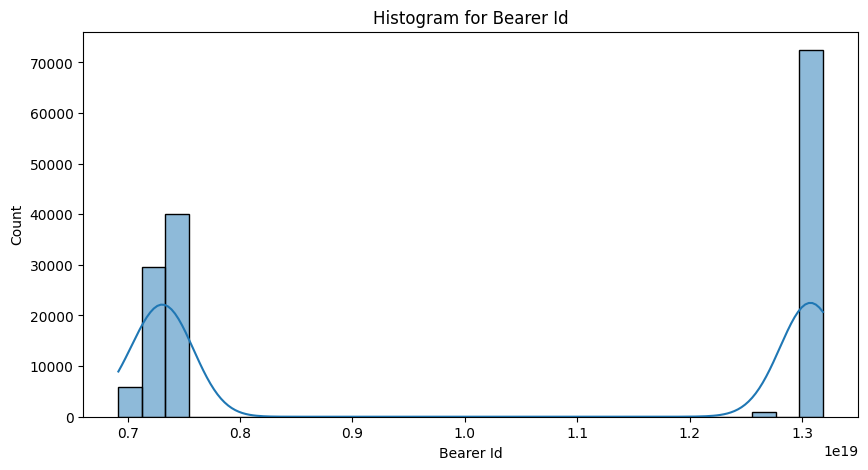

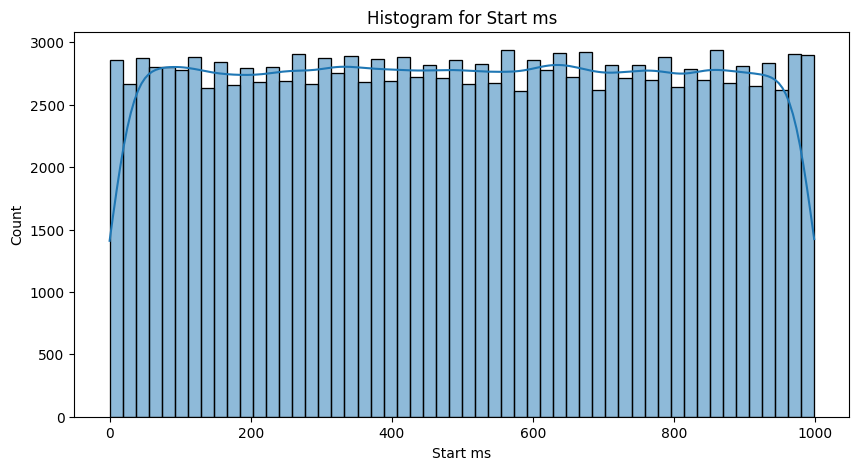

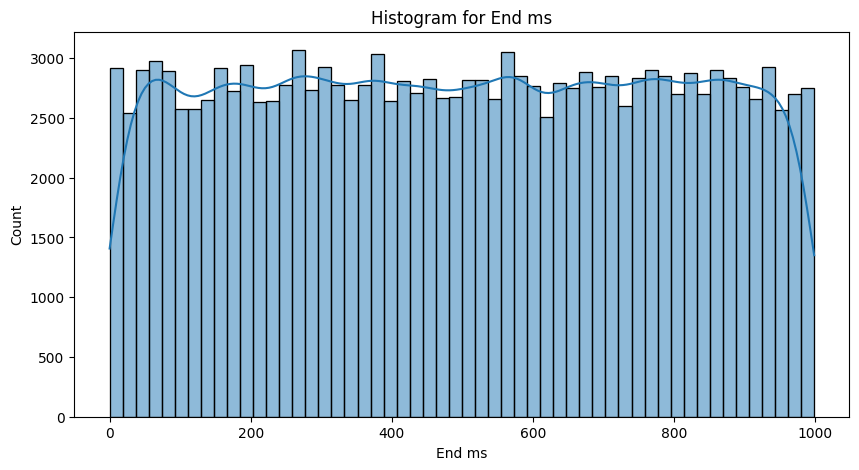

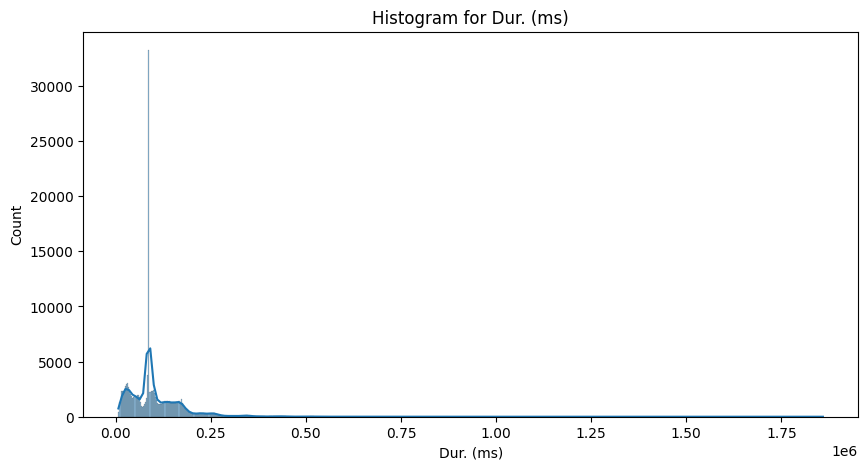

KeyboardInterrupt: 

In [15]:
analysis.graphical_univariate_analysis()

In [25]:
# basic_metrics = analysis.basic_metrics()
# print(basic_metrics)

TypeError: can only concatenate str (not "int") to str

In [12]:
correlation_results = analysis.bivariate_analysis()
print(correlation_results)

KeyError: "['total_data'] not in index"

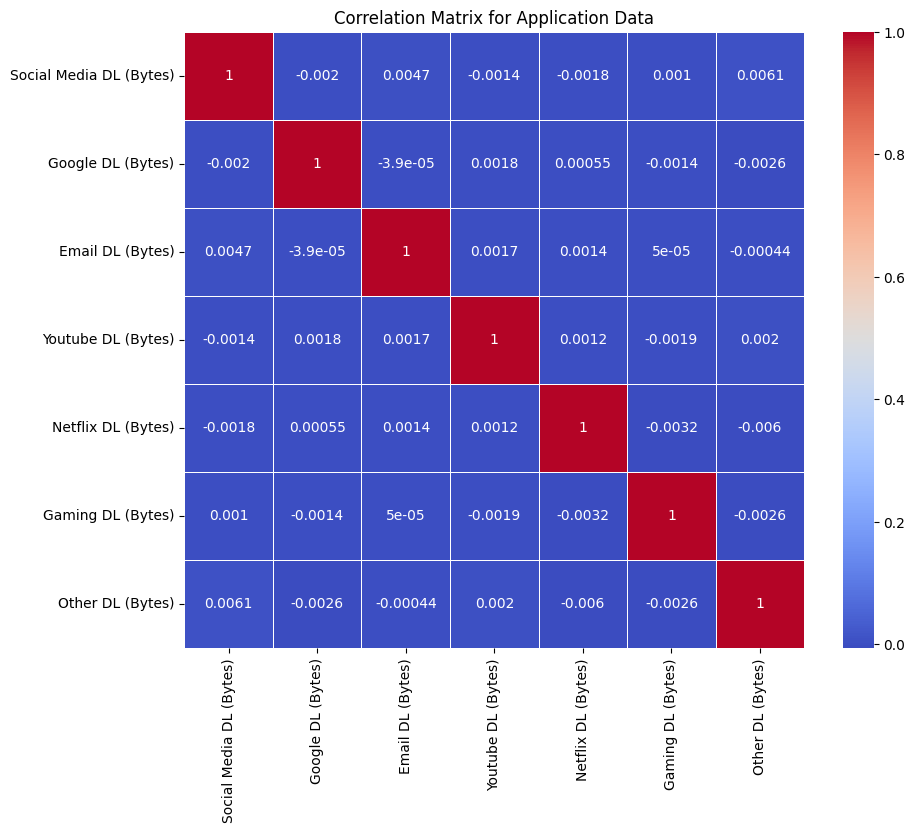

                         Social Media DL (Bytes)  Google DL (Bytes)  \
Social Media DL (Bytes)                 1.000000          -0.001954   
Google DL (Bytes)                      -0.001954           1.000000   
Email DL (Bytes)                        0.004745          -0.000039   
Youtube DL (Bytes)                     -0.001389           0.001760   
Netflix DL (Bytes)                     -0.001817           0.000548   
Gaming DL (Bytes)                       0.001018          -0.001421   
Other DL (Bytes)                        0.006126          -0.002557   

                         Email DL (Bytes)  Youtube DL (Bytes)  \
Social Media DL (Bytes)          0.004745           -0.001389   
Google DL (Bytes)               -0.000039            0.001760   
Email DL (Bytes)                 1.000000            0.001679   
Youtube DL (Bytes)               0.001679            1.000000   
Netflix DL (Bytes)               0.001351            0.001202   
Gaming DL (Bytes)                0.000050

In [13]:
app_corr_matrix = analysis.correlation_analysis()
print(app_corr_matrix)

In [14]:
pca_components, explained_variance = analysis.perform_pca(n_components=2)
print(pca_components)
print("Explained variance:", explained_variance)

                 PC1           PC2
0       2.507434e-02 -7.285842e-01
1      -9.464936e-02 -8.340539e-02
2      -7.237088e-01 -1.899860e+00
3      -2.328018e-01 -1.771402e-01
4      -5.610002e-01 -3.542110e-01
...              ...           ...
149996 -1.186698e+00  4.122273e-02
149997  8.829500e-01 -2.719373e-01
149998 -8.291916e-01  5.193006e-02
149999  1.201999e+00  2.667560e-01
150000  4.848733e-16 -1.367153e-15

[150001 rows x 2 columns]
Explained variance: [0.14439453 0.14355429]


In [15]:
from scripts.customer_engament import CustomerEngagement

In [16]:
engagement = CustomerEngagement(df, user_col='MSISDN/Number')


In [17]:
aggregated_metrics = engagement.aggregate_metrics_per_customer()
print("Aggregated Metrics per Customer:")
print(aggregated_metrics)

Aggregated Metrics per Customer:
        MSISDN/Number  number_of_sessions  total_session_duration  \
0        3.360100e+10                   1                116720.0   
1        3.360100e+10                   1                181230.0   
2        3.360100e+10                   1                134969.0   
3        3.360101e+10                   1                 49878.0   
4        3.360101e+10                   2                 37104.0   
...               ...                 ...                     ...   
106851   3.379000e+10                   1                  8810.0   
106852   3.379000e+10                   1                140988.0   
106853   3.197021e+12                   1                877385.0   
106854   3.370000e+14                   1                253030.0   
106855   8.823971e+14                   1                869844.0   

        total_download  total_upload  Social Media Total (Bytes)  \
0         8.426375e+08    36053108.0                   2232135.0   
1 

In [18]:
engagement_metrics = ['number_of_sessions', 'total_session_duration', 'total_download', 'total_upload',
                      'Social Media Total (Bytes)', 'Google Total (Bytes)', 'Email Total (Bytes)',
                      'Youtube Total (Bytes)', 'Netflix Total (Bytes)', 'Gaming Total (Bytes)', 'Other Total (Bytes)']

top_customers = engagement.report_top_10_customers_per_metric(metrics=engagement_metrics)
for metric, top_df in top_customers.items():
    print(f"\nTop 10 Customers for {metric}:")
    print(top_df[[engagement.user_col, metric]])


Top 10 Customers for number_of_sessions:
       MSISDN/Number  number_of_sessions
13526   3.362632e+10                  18
6437    3.361489e+10                  17
13180   3.362578e+10                  17
37052   3.365973e+10                  16
76363   3.367588e+10                  15
92923   3.376054e+10                  15
65118   3.366716e+10                  13
666     3.360313e+10                  12
1279    3.360452e+10                  12
13994   3.362708e+10                  12

Top 10 Customers for total_session_duration:
       MSISDN/Number  total_session_duration
13180   3.362578e+10              18553754.0
6437    3.361489e+10               9966898.0
92923   3.376054e+10               9279434.0
13526   3.362632e+10               8791927.0
65118   3.366716e+10               8744914.0
50281   3.366284e+10               6614270.0
57160   3.366469e+10               6288730.0
666     3.360313e+10               6287761.0
66029   3.366746e+10               5649882.0
92577   3.3

In [19]:
metrics_to_normalize = ['number_of_sessions', 'total_session_duration', 'total_download', 'total_upload']
scaled_metrics = engagement.normalize_metrics(metrics=metrics_to_normalize)
print("\nScaled Metrics:")
print(scaled_metrics.head())


Scaled Metrics:
   scaled_number_of_sessions  scaled_total_session_duration  \
0                  -0.481513                      -0.158014   
1                  -0.481513                       0.188148   
2                  -0.481513                      -0.060090   
3                  -0.481513                      -0.516690   
4                   0.799294                      -0.585235   

   scaled_total_download  scaled_total_upload  
0               0.449862            -0.596125  
1              -1.104067            -0.594685  
2              -0.165736            -0.504876  
3              -0.498672            -1.037143  
4               1.570279             1.036840  


In [20]:
kmeans_model = engagement.run_kmeans(k=3)
print("\nK-Means Clustering Model:")
print(kmeans_model)


K-Means Clustering Model:
KMeans(n_clusters=3, random_state=42)


In [21]:
cluster_statistics = engagement.compute_cluster_statistics()
print("\nCluster Statistics:")
print(cluster_statistics)


Cluster Statistics:
   cluster  number_of_sessions_min  number_of_sessions_max  \
0        0                       1                       4   
1        1                       0                       2   
2        2                       1                      18   

   number_of_sessions_mean  number_of_sessions_sum  \
0                 2.138700                   52396   
1                 1.004274                   78948   
2                 4.187984                   15684   

   total_session_duration_min  total_session_duration_max  \
0                     18235.0                   1573420.0   
1                      7142.0                   1042254.0   
2                     66594.0                  18553754.0   

   total_session_duration_mean  total_session_duration_sum  \
0                209384.350096                5.129707e+09   
1                103321.107401                8.122279e+09   
2                632003.088919                2.366852e+09   

   total_download_m

d:\Projects\10ac\Situational-Overview-Business-need-analyses\scripts\customer_engament.py:245: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y=metric_mean_col, data=self.cluster_stats, ax=ax, palette='Set2')
d:\Projects\10ac\Situational-Overview-Business-need-analyses\scripts\customer_engament.py:245: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y=metric_mean_col, data=self.cluster_stats, ax=ax, palette='Set2')
d:\Projects\10ac\Situational-Overview-Business-need-analyses\scripts\customer_engament.py:245: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` 

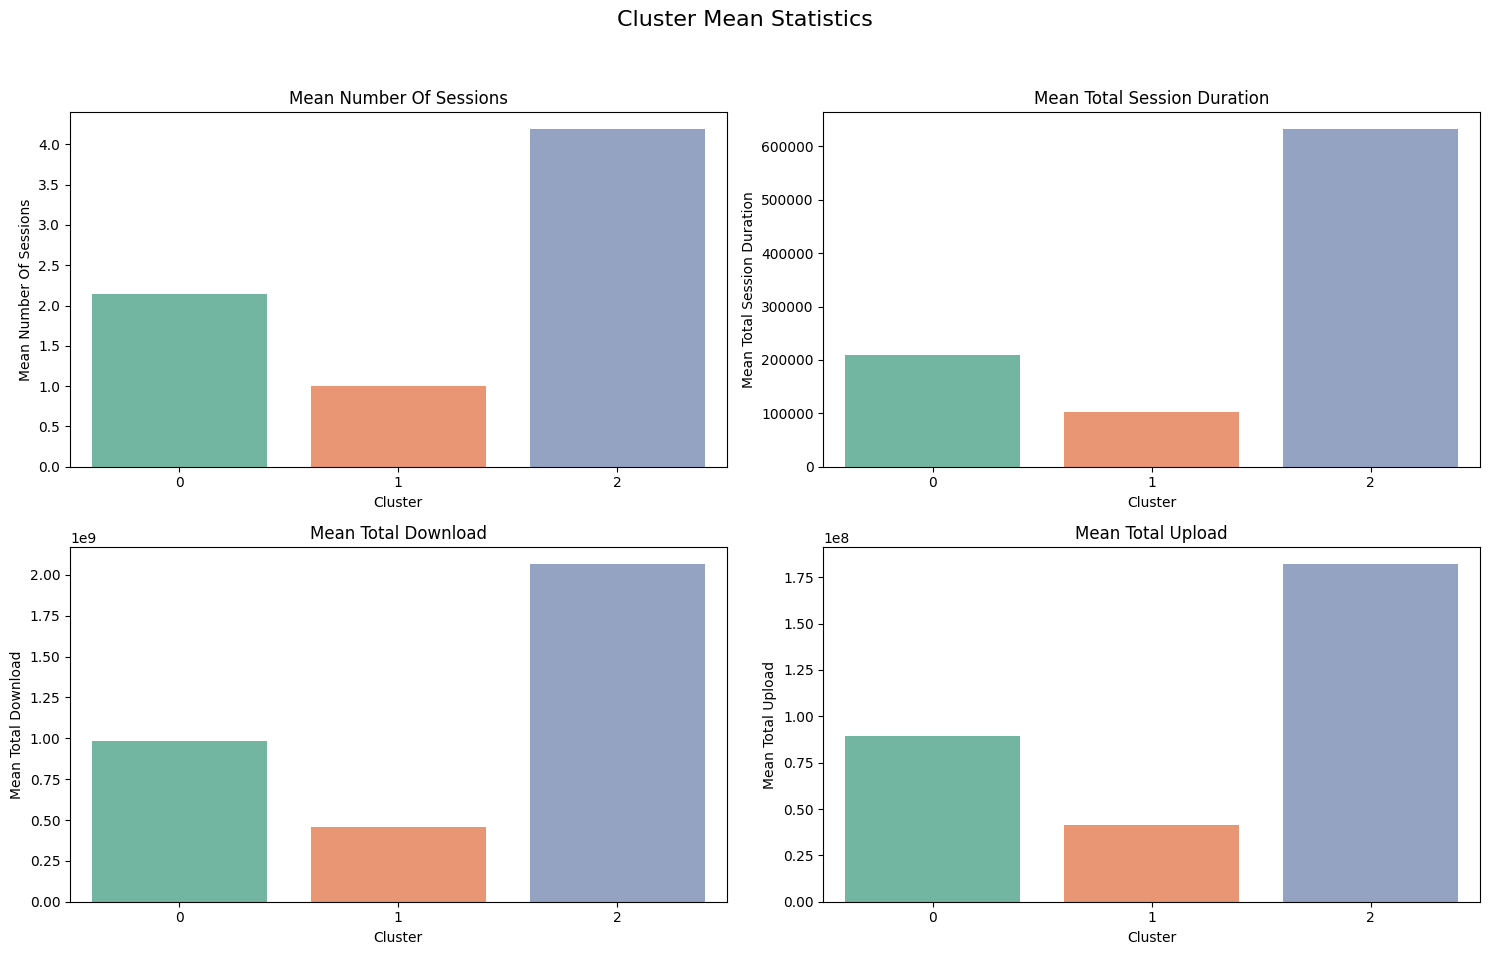

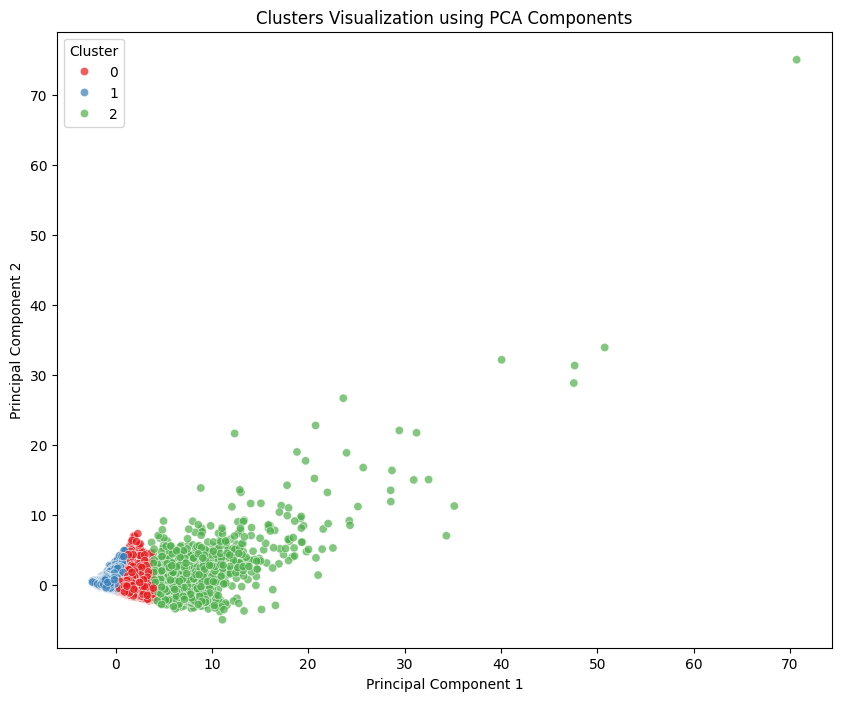


Top 10 Users for Social Media:
   MSISDN/Number  Social Media Total (Bytes)
0   3.362632e+10                  43374779.0
1   3.376054e+10                  39783189.0
2   3.365973e+10                  35412358.0
3   3.361489e+10                  28294544.0
4   3.362578e+10                  27135500.0
5   3.366716e+10                  24247850.0
6   3.378632e+10                  23974919.0
7   3.366907e+10                  23800834.0
8   3.360313e+10                  23077825.0
9   3.365849e+10                  23000066.0

Top 10 Users for Google:
   MSISDN/Number  Google Total (Bytes)
0   3.362632e+10           152191852.0
1   3.362578e+10           142307915.0
2   3.361489e+10           127973787.0
3   3.376054e+10           123223099.0
4   3.365973e+10           116516345.0
5   3.378632e+10           110254484.0
6   3.367588e+10           109860502.0
7   3.366716e+10           105032696.0
8   3.376127e+10            97089988.0
9   3.369876e+10            91935151.0

Top 10 Users for 

d:\Projects\10ac\Situational-Overview-Business-need-analyses\scripts\customer_engament.py:329: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Bytes', y='Application', data=top_apps_df, palette='viridis')


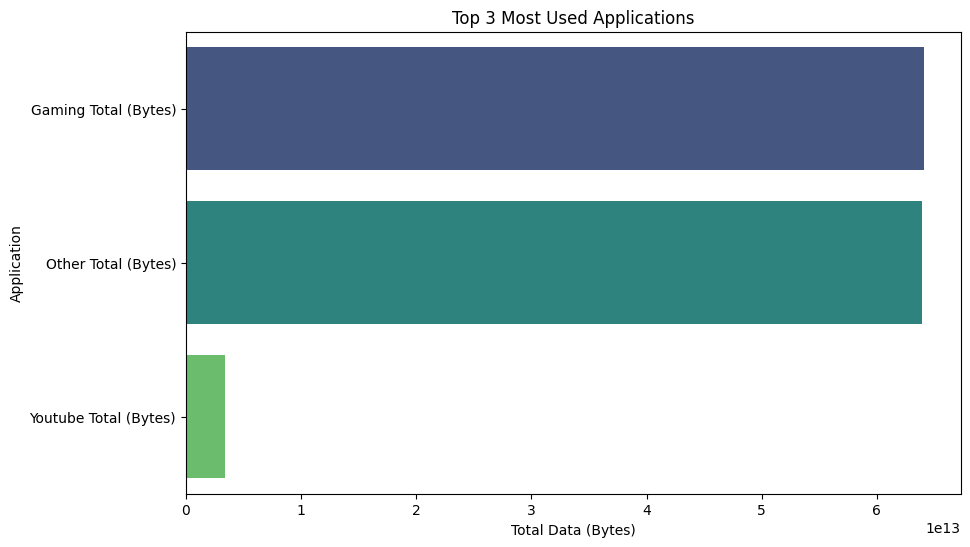

Cluster Statistics Interpretation:
--------------------------------------------------
Cluster 0.0:
  Number of Sessions: Min=1.0, Max=4.0, Mean=2.14, Sum=52396.0
  Total Session Duration (ms): Min=18235.0, Max=1573420.0, Mean=209384.35, Sum=5129707193.0
  Total Download (Bytes): Min=65270746.0, Max=2434589739.0, Mean=986403655.16, Sum=24165903147847.0
  Total Upload (Bytes): Min=23034394.0, Max=201233365.0, Mean=89339403.58, Sum=2188726048400.0


Cluster 1.0:
  Number of Sessions: Min=0.0, Max=2.0, Mean=1.00, Sum=78948.0
  Total Session Duration (ms): Min=7142.0, Max=1042254.0, Mean=103321.11, Sum=8122278895.0
  Total Download (Bytes): Min=8827082.0, Max=1368025509.0, Mean=455528078.57, Sum=35809973312702.0
  Total Upload (Bytes): Min=2866892.0, Max=111672954.0, Mean=41386946.51, Sum=3253510638714.0


Cluster 2.0:
  Number of Sessions: Min=1.0, Max=18.0, Mean=4.19, Sum=15684.0
  Total Session Duration (ms): Min=66594.0, Max=18553754.0, Mean=632003.09, Sum=2366851568.0
  Total Download 

In [22]:

engagement.visualize_cluster_statistics()

engagement.visualize_clusters_with_pca()

top_users_per_app = engagement.aggregate_top_users_per_application(top_n=10)
for app, top_df in top_users_per_app.items():
    print(f"\nTop 10 Users for {app}:")
    print(top_df)

engagement.plot_top_applications(top_n=3)

engagement.interpret_cluster_statistics()

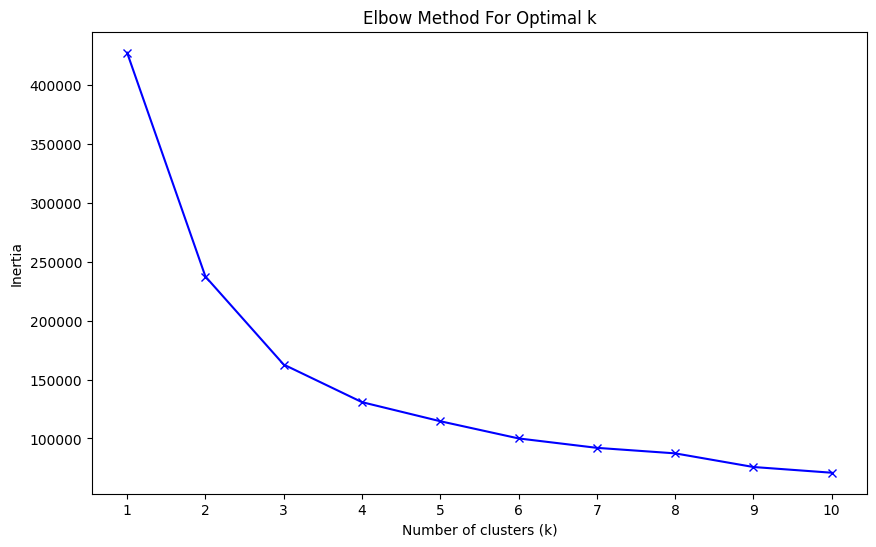

In [23]:
engagement.find_optimal_k_elbow_method(max_k=10)